In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from ariadne.util.deeppcb import DeepPCBData
from ariadne.util import showdefects
from ariadne.cv import get_defect_blobs
import ariadne.cv
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
import torch
import torchvision
import skimage as ski
import collections
from enum import IntEnum
from tqdm.notebook import tqdm
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rc('image', cmap='gray')

%matplotlib inline

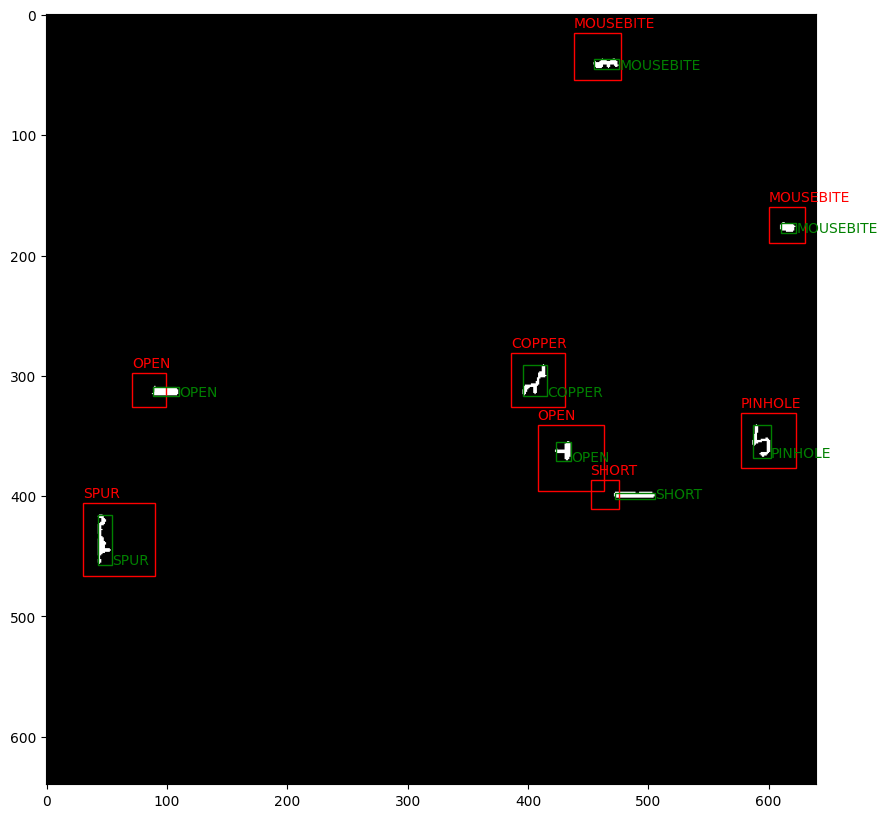

In [141]:
ds = DeepPCBData(Path('/Users/moon/git/DeepPCB'))

_, gr = ds.groups[0]
pair = gr[4]

annot = DeepPCBData._read_annot(pair['annotpath'])
img_obsv = np.asarray(Image.open(pair['testpath']).convert('1'))
img_truth = np.asarray(Image.open(pair['templatepath']).convert('1'))


blobs, labels, defect_mask = get_defect_blobs((img_truth, img_obsv))


fig, ax = showdefects(blobs, annot)
for region in ski.measure.regionprops(labels):
    minr, minc, maxr, maxc = region.bbox
    rect = patches.Rectangle((minc,minr), maxc-minc, maxr-minr,
                            facecolor='none', edgecolor='g')
    matches = [x for x in annot if bbox_overlaps_defect(region.bbox, x)]
    if len(matches) == 0:
        continue
    defect = matches[0]
    ax.text(maxc, maxr, f'{defect.ty.name}', color='g')
    ax.add_patch(rect)

In [144]:
ariadne.cv.featurize((img_truth, img_obsv), ground_truth=annot)

[{'defect': Defect(MOUSEBITE: (438, 15) to (438, 15)),
  'bbox': (37, 455, 45, 476),
  'features': [0.28846153846153844,
   0.8613861386138614,
   0.17307692307692307,
   0.0]},
 {'defect': Defect(MOUSEBITE: (600, 160) to (600, 160)),
  'bbox': (173, 610, 181, 623),
  'features': [0.29411764705882354,
   0.9102564102564102,
   0.29411764705882354,
   0.02564102564102564]},
 {'defect': Defect(COPPER: (386, 281) to (386, 281)),
  'bbox': (291, 396, 317, 416),
  'features': [1.0, 0.1171875, 1.0, 1.0]},
 {'defect': Defect(OPEN: (71, 298) to (71, 298)),
  'bbox': (309, 88, 317, 110),
  'features': [0.2037037037037037,
   0.823943661971831,
   0.09259259259259259,
   0.0]},
 {'defect': Defect(PINHOLE: (577, 331) to (577, 331)),
  'bbox': (341, 587, 368, 602),
  'features': [0.0, 0.768, 0.0, 0.0]},
 {'defect': Defect(OPEN: (408, 341) to (408, 341)),
  'bbox': (355, 423, 371, 436),
  'features': [0.18, 0.9157894736842105, 0.16, 0.0]},
 {'defect': Defect(SHORT: (452, 387) to (452, 387)),
  'bbo

In [32]:
DATASET = {} # pairid |-> {annot, features}

ds = DeepPCBData(Path('/Users/moon/git/DeepPCB'))
N_PAIRS = len(list(ds.flat))
for i, pair in enumerate(ds.flat):
    print(f'{100.*i/N_PAIRS:.2f}%')
    annot = DeepPCBData._read_annot(pair['annotpath'])
    img_obsv = np.asarray(Image.open(pair['testpath']).convert('1'))
    img_truth = np.asarray(Image.open(pair['templatepath']).convert('1'))
    img_pair = (img_truth, img_obsv)

    try:
        DATASET[pair['pairid']] = ariadne.cv.featurize(img_pair, ground_truth=annot)
        
    except ariadne.cv.Unclassifiable:
        print('lol')

0.00%
0.08%
0.16%
0.23%
0.31%
0.39%
0.47%
0.55%
0.63%
0.70%
0.78%
0.86%
0.94%
1.02%
1.09%
1.17%
1.25%
1.33%
1.41%
1.49%
1.56%
1.64%
1.72%
1.80%
1.88%
1.95%
2.03%
2.11%
2.19%
2.27%
2.35%
2.42%
lol
2.50%
2.58%
2.66%
2.74%
2.81%
lol
2.89%
2.97%
3.05%
3.13%
3.21%
3.28%
3.36%
3.44%
3.52%
3.60%
3.67%
3.75%
3.83%
3.91%
3.99%
4.07%
4.14%
4.22%
4.30%
4.38%
4.46%
4.53%
4.61%
4.69%
lol
4.77%
4.85%
4.93%
5.00%
5.08%
5.16%
5.24%
5.32%
5.39%
5.47%
5.55%
5.63%
lol
5.71%
5.79%
5.86%
5.94%
6.02%
6.10%
6.18%
6.25%
6.33%
6.41%
6.49%
6.57%
6.65%
6.72%
6.80%
6.88%
6.96%
7.04%
7.11%
7.19%
7.27%
7.35%
7.43%
7.51%
7.58%
7.66%
7.74%
lol
7.82%
7.90%
7.97%
8.05%
8.13%
8.21%
8.29%
8.37%
8.44%
8.52%
8.60%
8.68%
8.76%
8.84%
8.91%
8.99%
9.07%
9.15%
9.23%
9.30%
9.38%
9.46%
9.54%
9.62%
9.70%
9.77%
9.85%
9.93%
10.01%
10.09%
10.16%
10.24%
10.32%
10.40%
10.48%
10.56%
10.63%
10.71%
10.79%
lol
10.87%
10.95%
11.02%
11.10%
11.18%
11.26%
11.34%
11.42%
lol
11.49%
11.57%
11.65%
lol
11.73%
11.81%
11.88%
11.96%
12.04%
12.12%
12.2

90.85%
90.93%
91.01%
91.09%
91.16%
91.24%
91.32%
91.40%
91.48%
91.56%
91.63%
91.71%
91.79%
91.87%
91.95%
92.03%
92.10%
92.18%
92.26%
92.34%
92.42%
92.49%
92.57%
92.65%
92.73%
92.81%
92.89%
92.96%
93.04%
93.12%
93.20%
93.28%
93.35%
93.43%
93.51%
93.59%
93.67%
93.75%
93.82%
93.90%
93.98%
94.06%
94.14%
94.21%
94.29%
lol
94.37%
94.45%
94.53%
94.61%
94.68%
94.76%
94.84%
94.92%
95.00%
95.07%
95.15%
95.23%
95.31%
95.39%
95.47%
95.54%
95.62%
95.70%
95.78%
95.86%
95.93%
96.01%
96.09%
96.17%
96.25%
96.33%
lol
96.40%
96.48%
96.56%
96.64%
96.72%
96.79%
96.87%
96.95%
97.03%
97.11%
97.19%
97.26%
97.34%
97.42%
97.50%
97.58%
lol
97.65%
97.73%
97.81%
97.89%
97.97%
98.05%
98.12%
98.20%
98.28%
98.36%
98.44%
98.51%
98.59%
98.67%
98.75%
98.83%
98.91%
98.98%
99.06%
99.14%
99.22%
99.30%
99.37%
99.45%
99.53%
99.61%
99.69%
99.77%
99.84%
99.92%


In [63]:
X = []
y = []
for _, defects in DATASET.items():
    for defect in defects:
        X.append(defect['features'])
        y.append(defect['defect'].ty.name)
X = np.array(X)
        
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

SVC()

In [64]:
clf.predict(X[0,:].reshape(1, -1))

array(['OPEN'], dtype='<U9')

In [65]:
clf.score(X, y)

0.709259823332318